In [ ]:
# For loading Packages
import pandas as pd

# For mathematical calculations
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# To build and evaluate model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read train data
train_df = pd.read_csv("Datasets/train.csv")
# Read test data
test_df = pd.read_csv("Datasets/test.csv")

In [ ]:
# copy of train and test data to prevent making changes to the original datasets
train_df_1 = train_df.copy()
test_df_1 = test_df.copy()

In [ ]:
# view columns of the train data
train_df_1.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
# print datatypes of the train data
train_df_1.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
# Print shape of train data
print("The shape of the train dataset is: ", train_df_1.shape)

# Print shape of test data
print("The shape of the test dataset is: ", test_df_1.shape)

The shape of the train dataset is:  (8693, 14)
The shape of the test dataset is:  (4277, 13)


In [ ]:
# Normalize is set to true to print proportions instead of number
train_df_1['Transported'].value_counts(normalize = True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

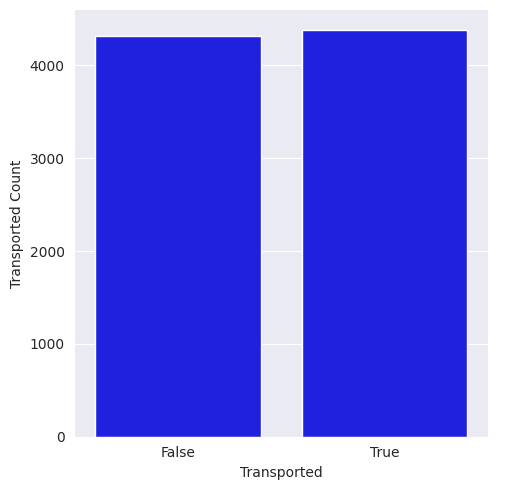

In [ ]:
# Visualize target variable
ax = sns.catplot(x = "Transported", data = train_df_1, kind = "count", color = "b")
ax.set_axis_labels("Transported", "Transported Count")

<Axes: title={'center': 'VIP'}, xlabel='VIP'>

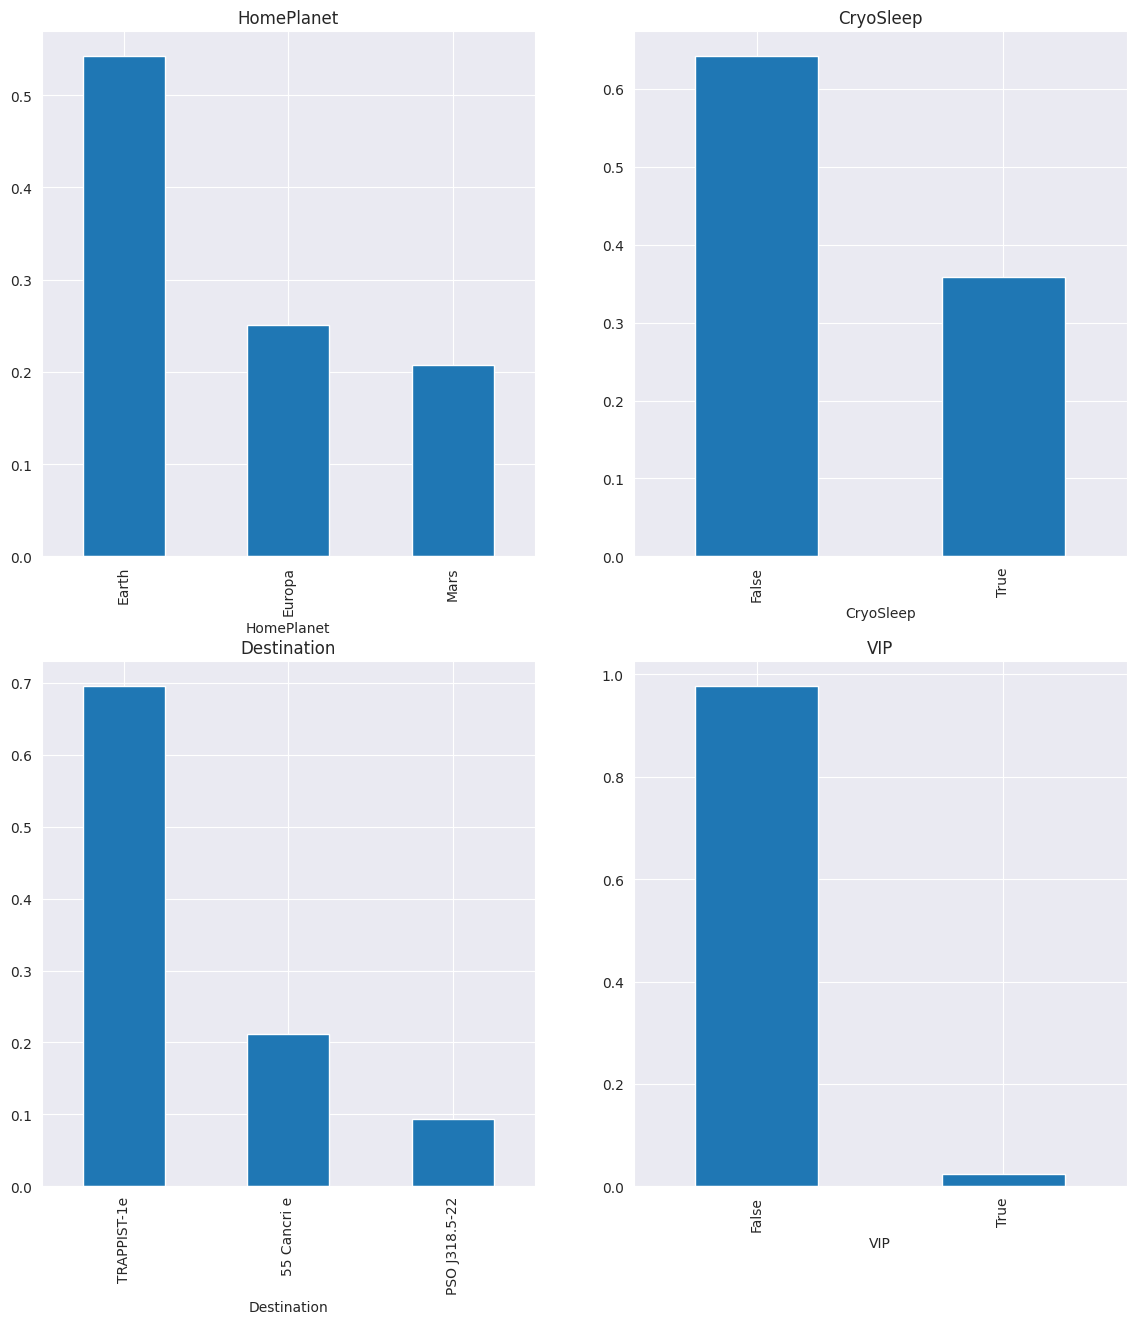

In [ ]:
# Visualize independent categorical features
plt.figure(figsize = (14, 15))
plt.subplot(221)
train_df_1['HomePlanet'].value_counts(normalize = True).plot.bar(title = 'HomePlanet')
plt.subplot(222)
train_df_1['CryoSleep'].value_counts(normalize = True).plot.bar(title = 'CryoSleep')
plt.subplot(223)
train_df_1['Destination'].value_counts(normalize = True).plot.bar(title = 'Destination')
plt.subplot(224)
train_df_1['VIP'].value_counts(normalize = True).plot.bar(title = 'VIP')

<Axes: title={'center': 'CabinSide'}, xlabel='CabinSide'>

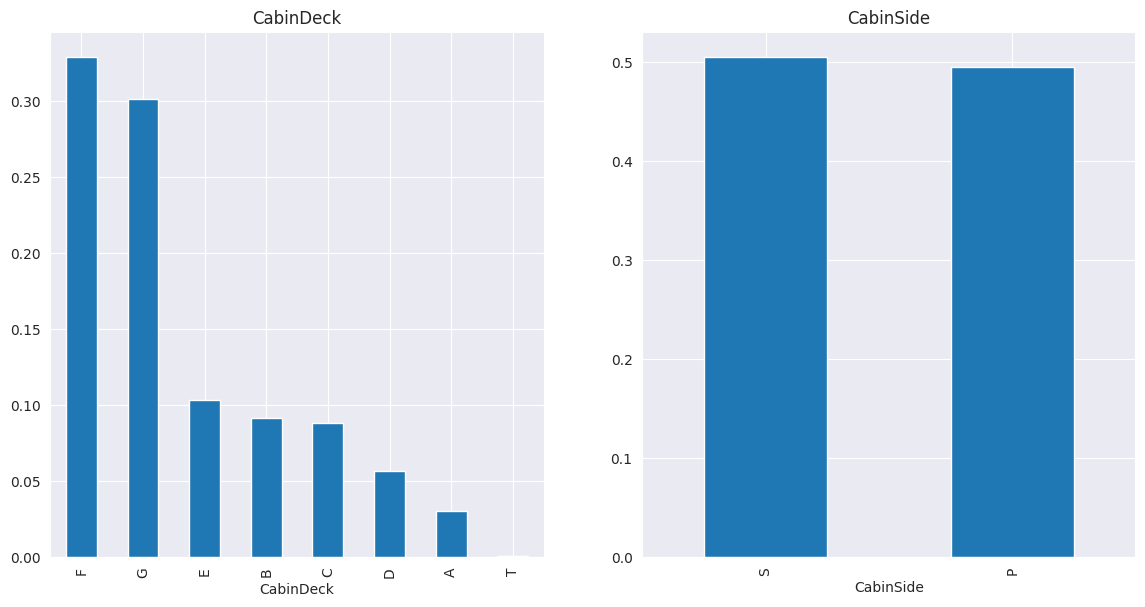

In [ ]:
# Extract CabinDeck, CabinNo. and CabinSide feature from Cabin
train_df_1[["CabinDeck", "CabinNo.", "CabinSide"]] = train_df_1["Cabin"].str.split('/', expand = True)

# Visualize cabin feature
plt.figure(figsize = (14, 15))
plt.subplot(221)
train_df_1['CabinDeck'].value_counts(normalize = True).plot.bar(title = 'CabinDeck')
plt.subplot(222)
train_df_1['CabinSide'].value_counts(normalize = True).plot.bar(title = 'CabinSide')

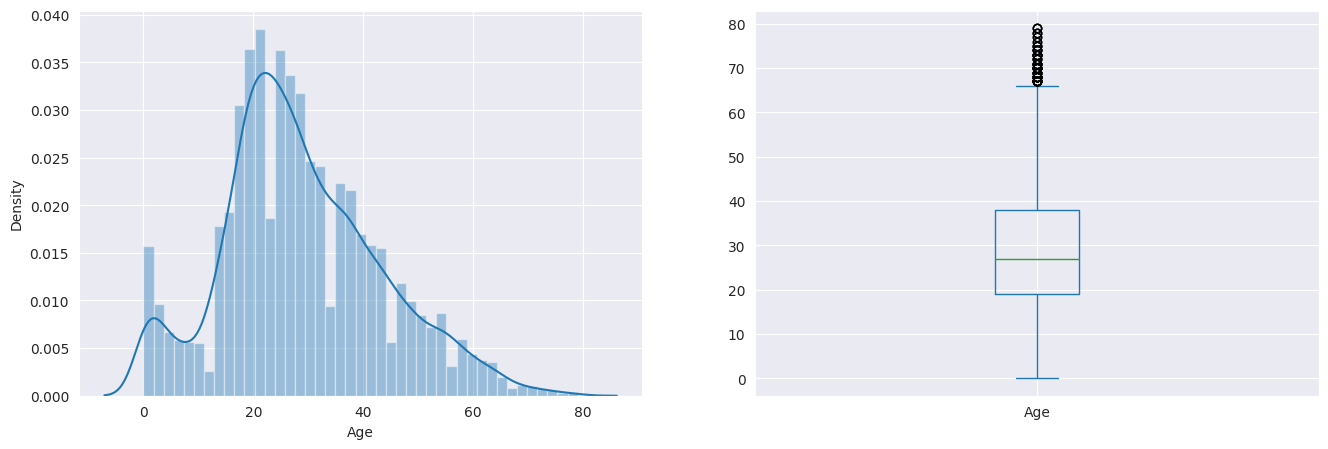

In [ ]:
# Visualize Age variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['Age']);
plt.subplot(122)
train_df_1['Age'].plot.box(figsize = (16, 5));
plt.show()

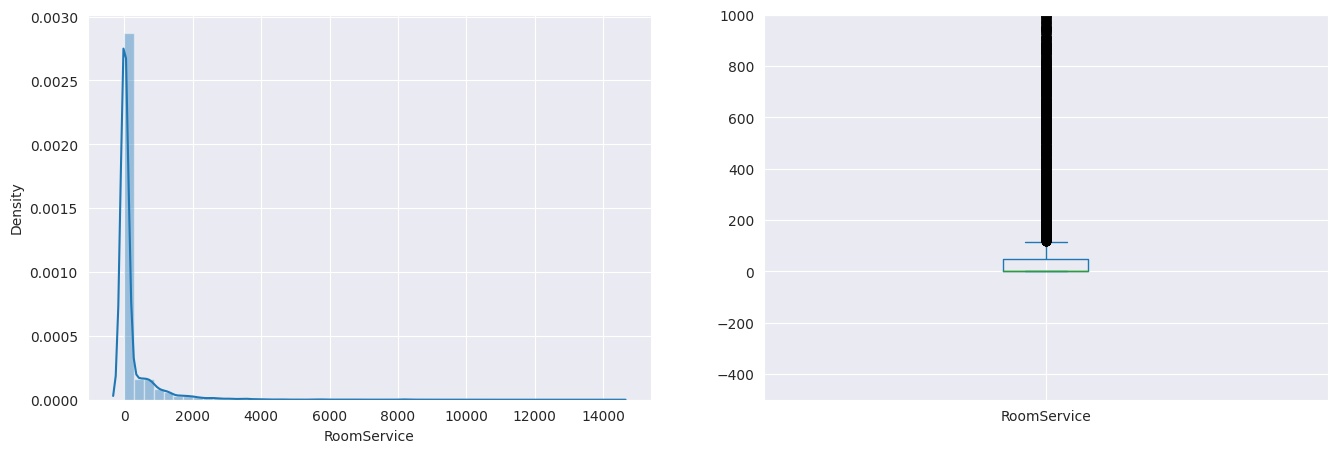

In [ ]:
# Visualize RoomService variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['RoomService']);
plt.subplot(122)
train_df_1['RoomService'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

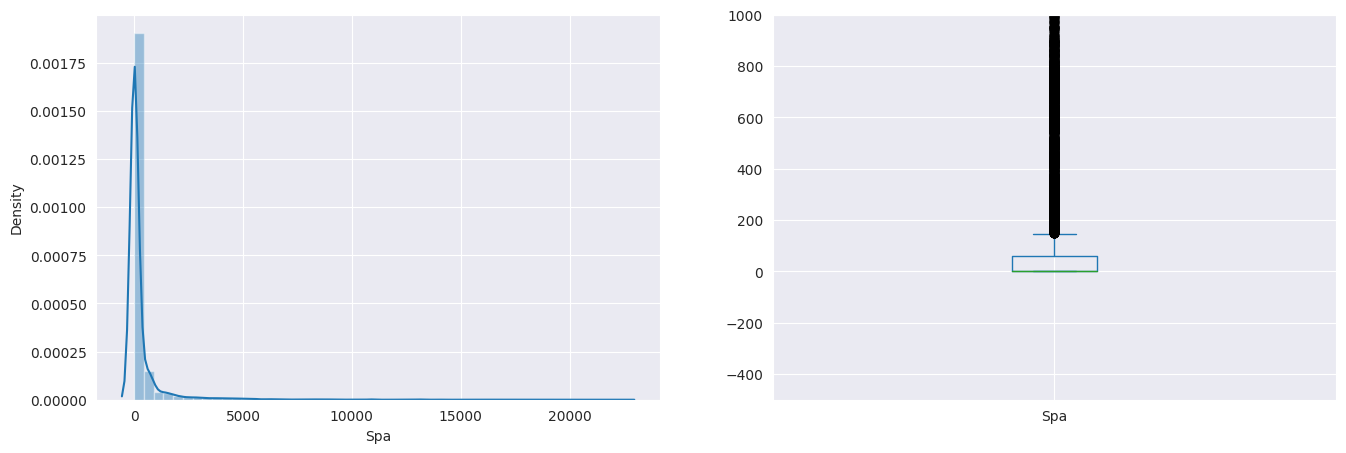

In [ ]:
# Visualize Spa variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['Spa']);
plt.subplot(122)
train_df_1['Spa'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

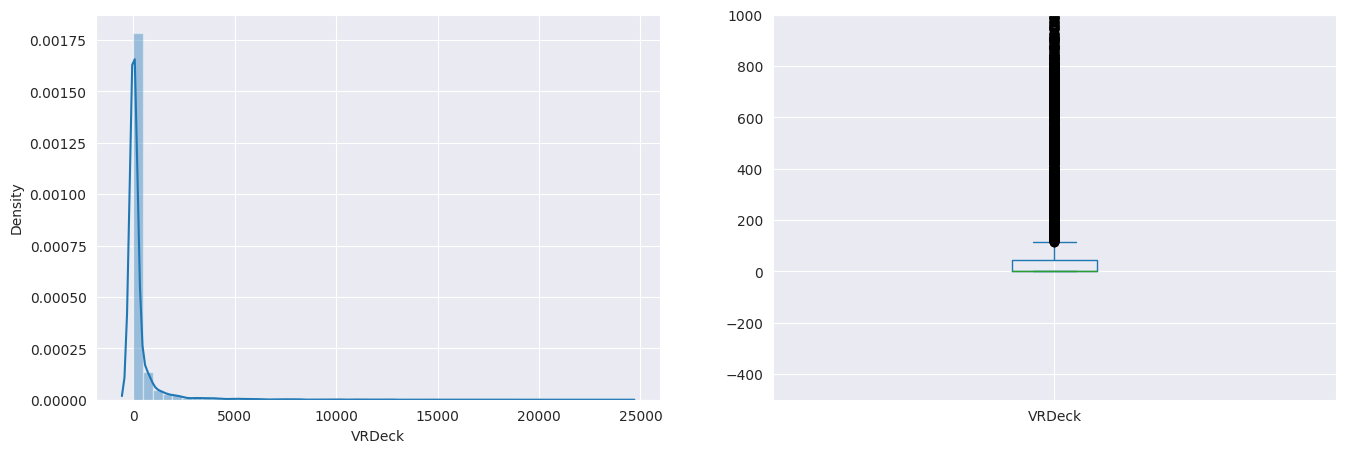

In [ ]:
# Visualize VRDeck variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['VRDeck']);
plt.subplot(122)
train_df_1['VRDeck'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

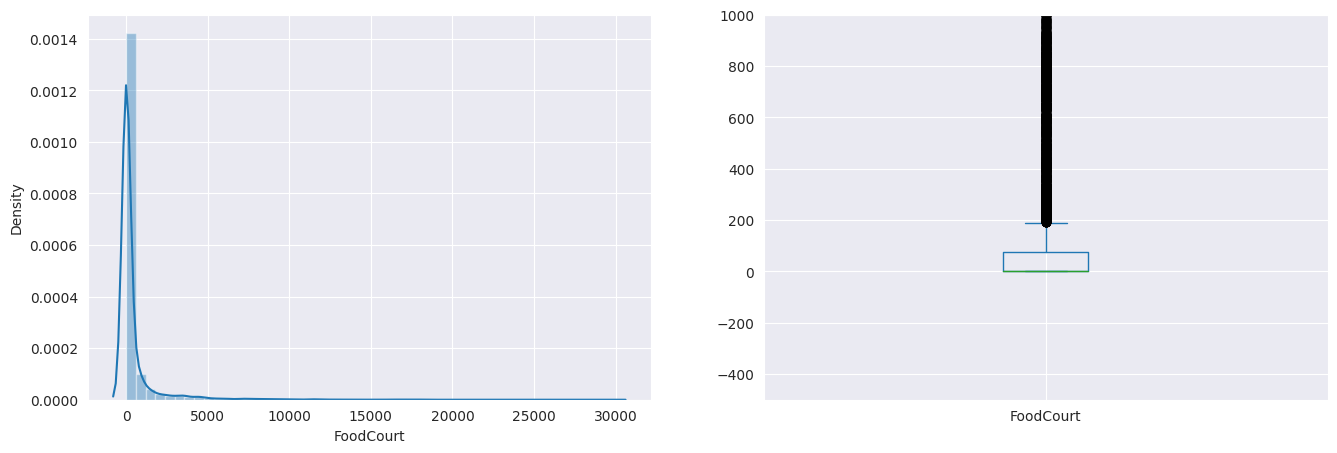

In [ ]:
# Visualize FoodCourt variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['FoodCourt']);
plt.subplot(122)
train_df_1['FoodCourt'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

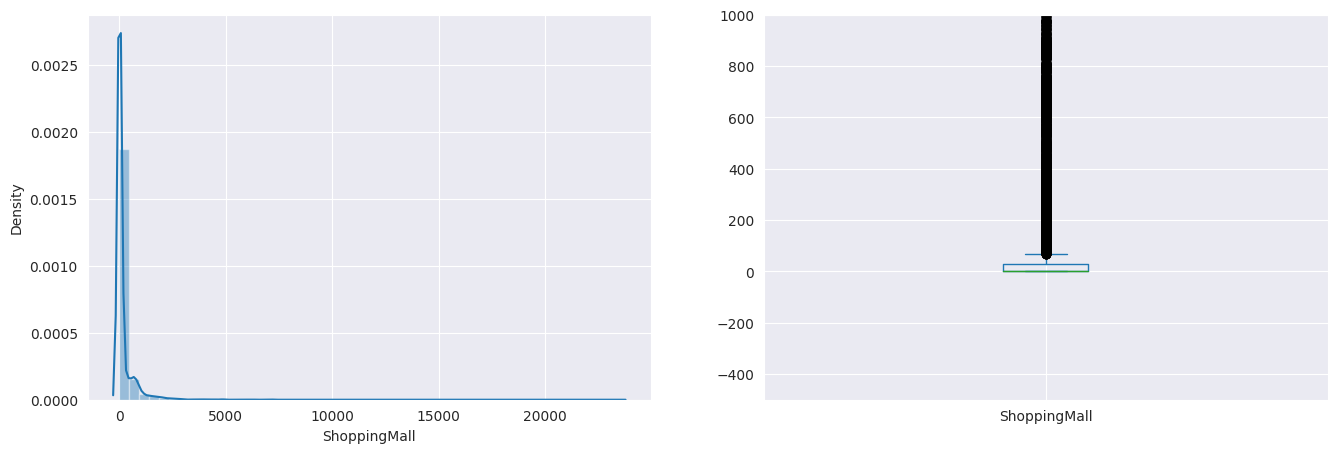

In [ ]:
# Visualize ShoppingMall variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df_1['ShoppingMall']);
plt.subplot(122)
train_df_1['ShoppingMall'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

In [ ]:
HomePlanet_Transported = train_df_1.groupby('HomePlanet').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

HomePlanet_Transported['TransportedPercentage'] = HomePlanet_Transported['Transported'] / HomePlanet_Transported['PassengerId']

CryoSleep_Transported = train_df_1.groupby('CryoSleep').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CryoSleep_Transported['TransportedPercentage'] = CryoSleep_Transported['Transported'] / CryoSleep_Transported['PassengerId']

Destination_Transported = train_df_1.groupby('Destination').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

Destination_Transported['TransportedPercentage'] = Destination_Transported['Transported'] / Destination_Transported['PassengerId']

VIP_Transported = train_df_1.groupby('VIP').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

VIP_Transported['TransportedPercentage'] = VIP_Transported['Transported'] / VIP_Transported['PassengerId']

<Axes: xlabel='VIP', ylabel='TransportedPercentage'>

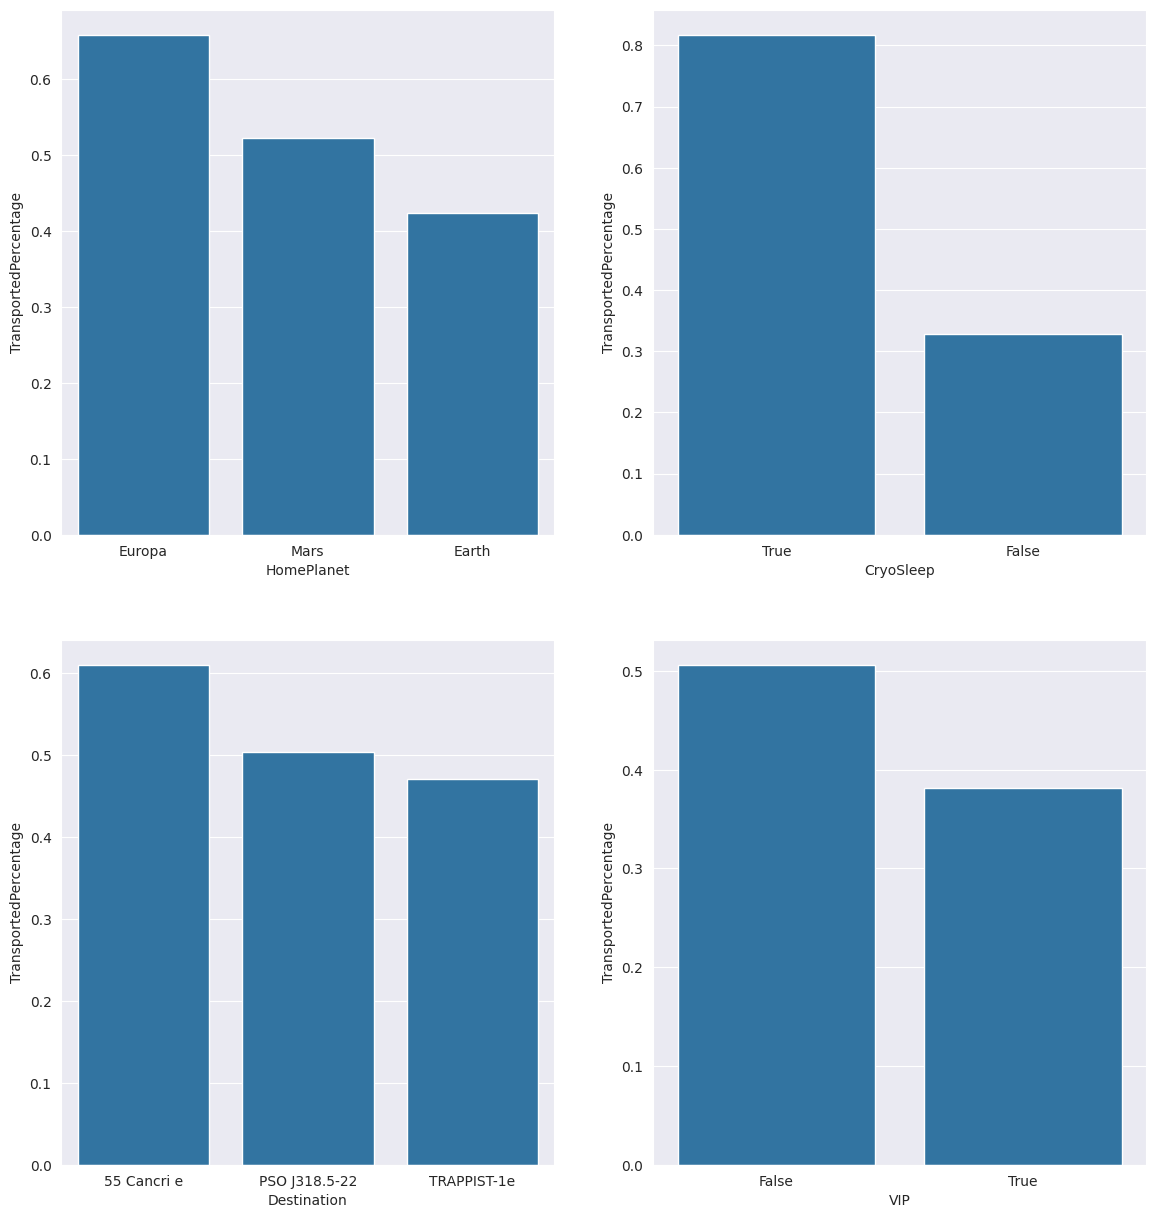

In [ ]:
# Visualize categorical features vs target variable
plt.figure(figsize = (14, 15))
plt.subplot(221)
sns.barplot(x = "HomePlanet", y = "TransportedPercentage", data = HomePlanet_Transported, order = HomePlanet_Transported.sort_values('TransportedPercentage', ascending = False).HomePlanet)
plt.subplot(222)
sns.barplot(x = "CryoSleep", y = "TransportedPercentage", data = CryoSleep_Transported, order = CryoSleep_Transported.sort_values('TransportedPercentage', ascending = False).CryoSleep)
plt.subplot(223)
sns.barplot(x = "Destination", y = "TransportedPercentage", data = Destination_Transported, order = Destination_Transported.sort_values('TransportedPercentage', ascending = False).Destination)
plt.subplot(224)
sns.barplot(x = "VIP", y = "TransportedPercentage", data = VIP_Transported, order = VIP_Transported.sort_values('TransportedPercentage', ascending = False).VIP)

<Axes: xlabel='CabinSide', ylabel='TransportedPercentage'>

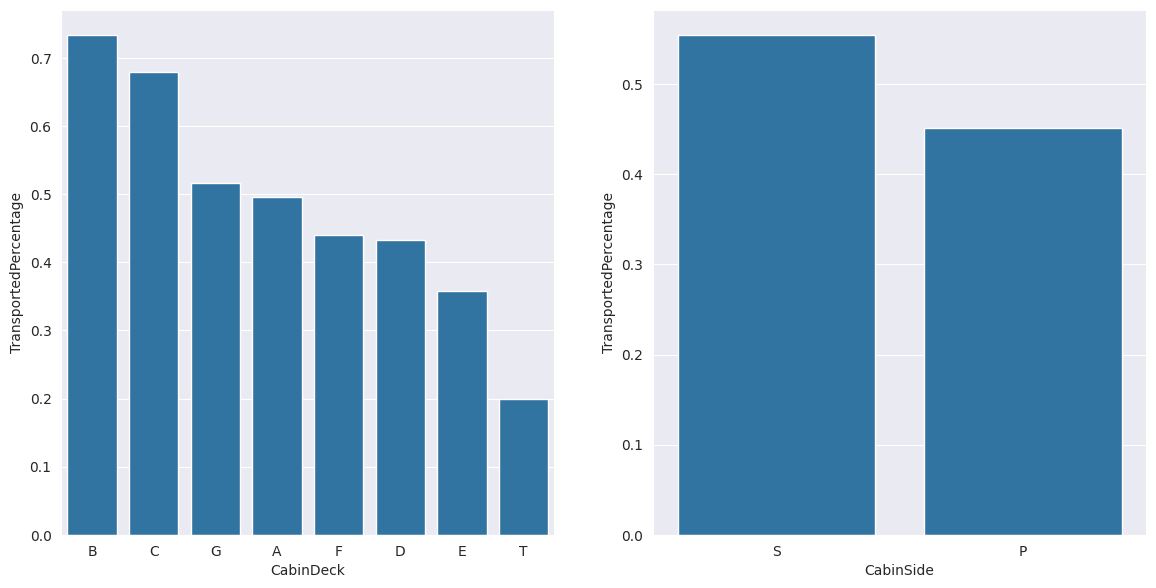

In [ ]:
CabinDeck_Transported = train_df_1.groupby('CabinDeck').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinDeck_Transported['TransportedPercentage'] = CabinDeck_Transported['Transported'] / CabinDeck_Transported['PassengerId']

CabinSide_Transported = train_df_1.groupby('CabinSide').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinSide_Transported['TransportedPercentage'] = CabinSide_Transported['Transported'] / CabinSide_Transported['PassengerId']

# Visualize Cabin features vs target variable
plt.figure(figsize = (14, 15))
plt.subplot(221)
sns.barplot(x = "CabinDeck", y = "TransportedPercentage", data = CabinDeck_Transported, order = CabinDeck_Transported.sort_values('TransportedPercentage', ascending = False).CabinDeck)
plt.subplot(222)
sns.barplot(x = "CabinSide", y = "TransportedPercentage", data = CabinSide_Transported, order = CabinSide_Transported.sort_values('TransportedPercentage', ascending = False).CabinSide)

<Axes: xlabel='NoInPassengerGroup', ylabel='TransportedPercentage'>

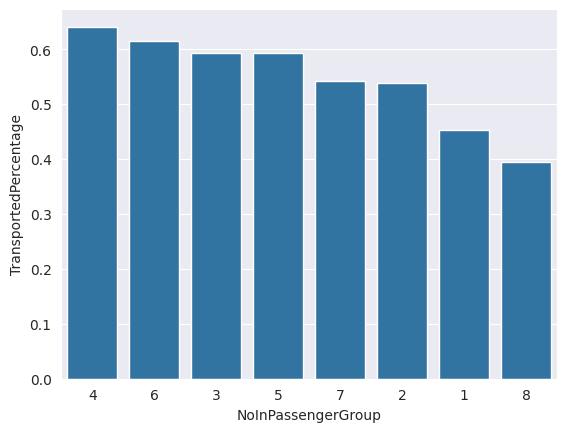

In [ ]:
# Extract PassengerGroup column from PassengerId column
train_df_1["PassengerGroup"] = train_df_1["PassengerId"].str.split('_', expand = True)[0]

# Create dataframe -No_People_In_PassengerGroup that contains the PassengerGroup and the no passengers in the group
No_People_In_PassengerGroup = train_df_1.groupby('PassengerGroup').aggregate({'PassengerId': 'size'}).reset_index()
No_People_In_PassengerGroup = No_People_In_PassengerGroup.rename(columns = {"PassengerId": "NoInPassengerGroup"})

train_df_1 = train_df_1.merge(No_People_In_PassengerGroup[["PassengerGroup", "NoInPassengerGroup"]], how = 'left', on = ['PassengerGroup'])
# create dataframe NoInPassengerGroup_Transported that has No of passengers in a group transported and the percentage of passengers in a group transported
NoInPassengerGroup_Transported = train_df_1.groupby('NoInPassengerGroup').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

NoInPassengerGroup_Transported['TransportedPercentage'] = NoInPassengerGroup_Transported['Transported'] / NoInPassengerGroup_Transported['PassengerId']

# Visualize NoInPassengerGroup vs transported
sns.barplot(x = "NoInPassengerGroup", y = "TransportedPercentage", data = NoInPassengerGroup_Transported, order = NoInPassengerGroup_Transported.sort_values('TransportedPercentage', ascending = False).NoInPassengerGroup)

<Axes: xlabel='IsAlone', ylabel='TransportedPercentage'>

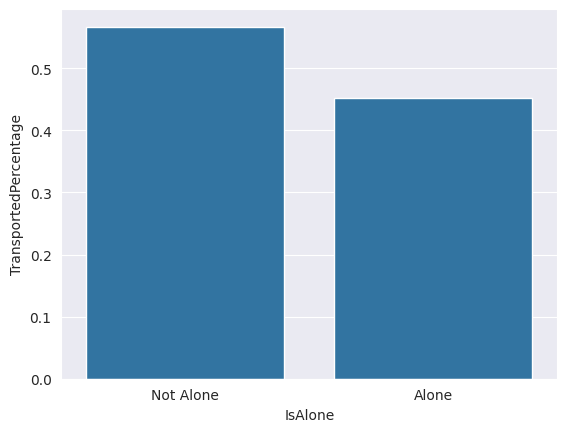

In [ ]:
No_People_In_PassengerGroup["IsAlone"] = No_People_In_PassengerGroup["NoInPassengerGroup"].apply(lambda x: "Not Alone" if x > 1 else "Alone")
train_df_1 = train_df_1.merge(No_People_In_PassengerGroup[["PassengerGroup", "IsAlone"]], how = 'left', on = ['PassengerGroup'])

IsAlone_Transported = train_df_1.groupby('IsAlone').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe IsAlone_Transported that contains percentage of passengers transported Alone or Not Alone
IsAlone_Transported['TransportedPercentage'] = IsAlone_Transported['Transported'] / IsAlone_Transported['PassengerId']

# Visualize IsAlone vs transported
sns.barplot(x = "IsAlone", y = "TransportedPercentage", data = IsAlone_Transported, order = IsAlone_Transported.sort_values('TransportedPercentage', ascending = False).IsAlone)

<Axes: xlabel='FamilySizeCat', ylabel='TransportedPercentage'>

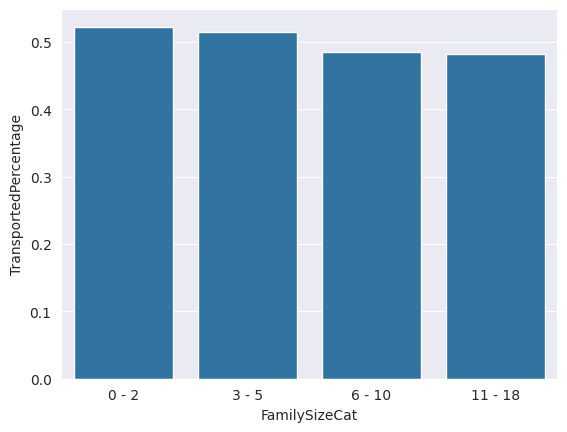

In [ ]:
# Extract FamilyName column from Name column
train_df_1["FamilyName"] = train_df_1["Name"].str.split(' ', expand = True)[1]

# Create dataframe -NoRelatives that contains the FamilyName and the no of relatives in a Family
NoRelatives = train_df_1.groupby('FamilyName')['PassengerId'].count().reset_index()
NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NoRelatives"})

train_df_1 = train_df_1.merge(NoRelatives[["FamilyName", "NoRelatives"]], how = 'left', on = ['FamilyName'])

train_df_1["FamilySizeCat"] = pd.cut(train_df_1.NoRelatives, bins = [0, 2, 5, 10, 18], labels = ['0 - 2', '3 - 5', '6 - 10', '11 - 18'])

# create dataframe FamilySizeCat_Transported that has the Family Size Category and the percentage transported
FamilySizeCat_Transported = train_df_1.groupby('FamilySizeCat').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

FamilySizeCat_Transported['TransportedPercentage'] = FamilySizeCat_Transported['Transported'] / FamilySizeCat_Transported['PassengerId']

# Visualize FamilySizeCat vs transported
sns.barplot(x = "FamilySizeCat", y = "TransportedPercentage", data = FamilySizeCat_Transported, order = FamilySizeCat_Transported.sort_values('TransportedPercentage', ascending = False).FamilySizeCat)

(-800.0, 12000.0)

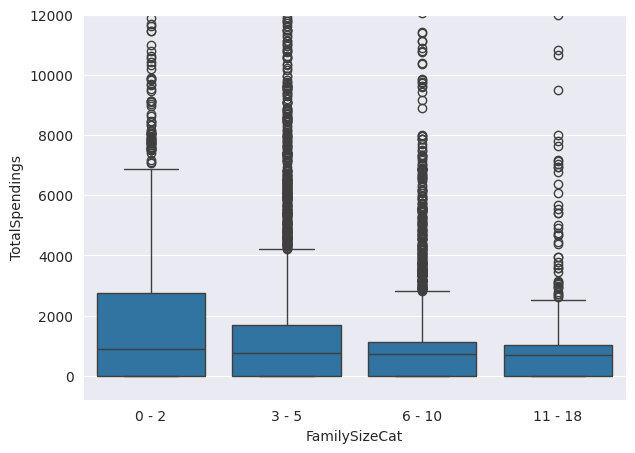

In [ ]:
# Create total spending feature
train_df_1["TotalSpendings"] = train_df_1["FoodCourt"] + \
                                 train_df_1["ShoppingMall"] + \
                                 train_df_1["RoomService"] + \
                                 train_df_1["Spa"] + \
                                 train_df_1["VRDeck"]

# FamilySizeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df_1, x = "FamilySizeCat", y = "TotalSpendings")
plt.ylim([-800, 12000])

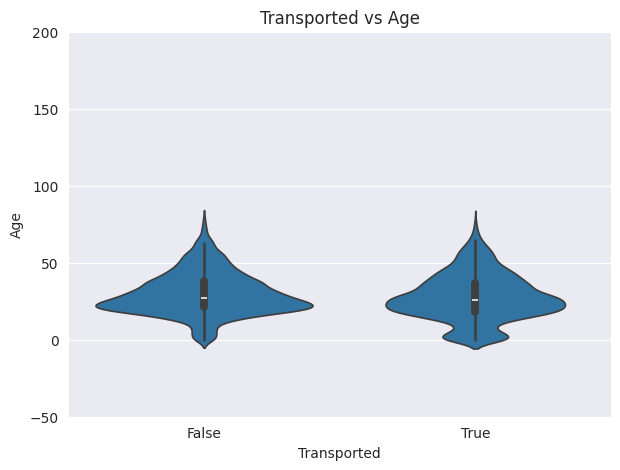

In [ ]:
# Transported vs Age
plt.figure(figsize=(7, 5))
sns.violinplot(x="Transported", y="Age", data=train_df_1)
plt.ylim([-50, 200])  # Fixing the y-axis range
plt.xlabel("Transported")  # Adding the x-axis label
plt.ylabel("Age")  # Adding the y-axis label
plt.title("Transported vs Age")  # Adding the plot title
plt.show()

<Axes: xlabel='AgeCat', ylabel='TransportedPercentage'>

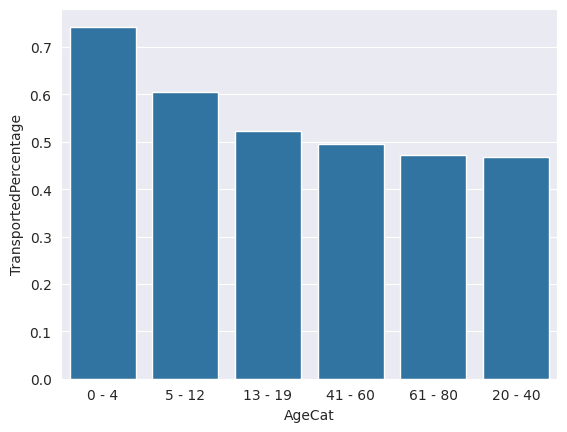

In [ ]:
# Extract Age Category column from Age column
train_df_1["AgeCat"] = pd.cut(train_df_1['Age'], bins=[0.0, 4.0, 12.0, 19.0, 40.0, 60.0, 80.0], labels=['0 - 4', '5 - 12', '13 - 19', '20 - 40', '41 - 60', '61 - 80'])

# Group by AgeCat and calculate the sum of Transported and count of PassengerId
AgeCat_Transported = train_df_1.groupby('AgeCat').agg({'Transported': 'sum', 'PassengerId': 'size'}).reset_index()

# Create dataframe AgeCat_Transported that has the Age Category and the percentage transported
AgeCat_Transported['TransportedPercentage'] = AgeCat_Transported['Transported'] / AgeCat_Transported['PassengerId']

# Visualize AgeCat vs transported
sns.barplot(x='AgeCat', y='TransportedPercentage', data=AgeCat_Transported, order=AgeCat_Transported.sort_values('TransportedPercentage', ascending=False)['AgeCat'])

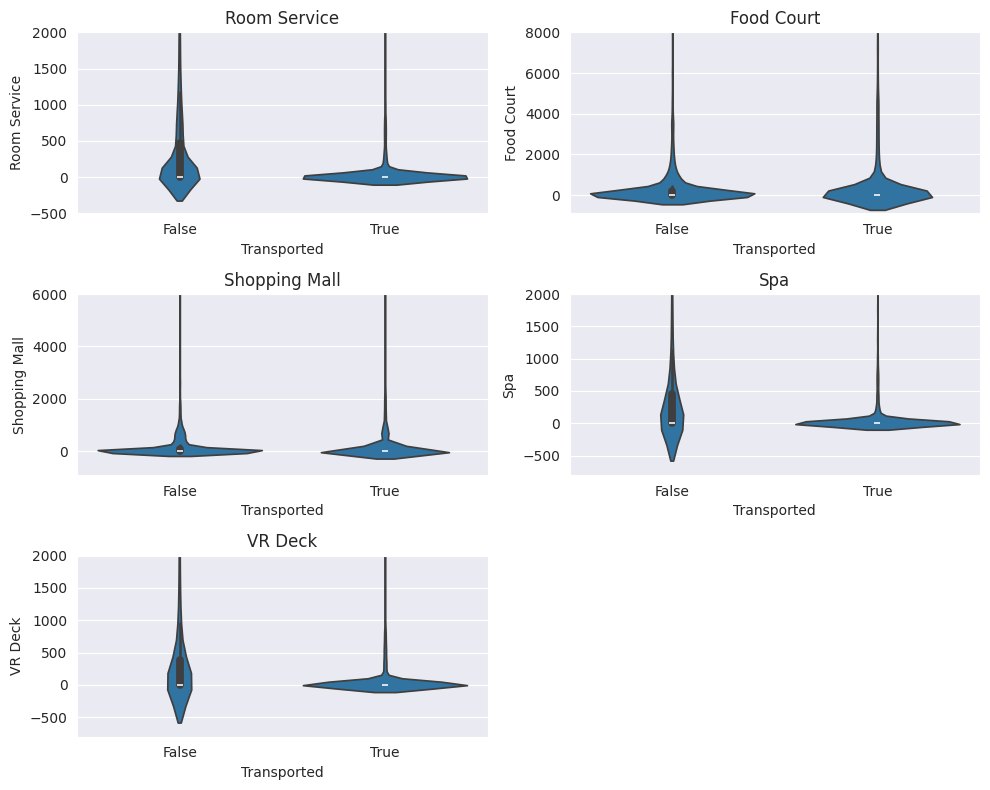

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["RoomService"])
plt.title("Room Service")
plt.xlabel("Transported")
plt.ylabel("Room Service")
plt.ylim([-500, 2000])

plt.subplot(3, 2, 2)
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["FoodCourt"])
plt.title("Food Court")
plt.xlabel("Transported")
plt.ylabel("Food Court")
plt.ylim([-900, 8000])

plt.subplot(3, 2, 3)
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["ShoppingMall"])
plt.title("Shopping Mall")
plt.xlabel("Transported")
plt.ylabel("Shopping Mall")
plt.ylim([-900, 6000])

plt.subplot(3, 2, 4)
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["Spa"])
plt.title("Spa")
plt.xlabel("Transported")
plt.ylabel("Spa")
plt.ylim([-800, 2000])

plt.subplot(3, 2, 5)
sns.violinplot(x=train_df_1["Transported"], y=train_df_1["VRDeck"])
plt.title("VR Deck")
plt.xlabel("Transported")
plt.ylabel("VR Deck")
plt.ylim([-800, 2000])

plt.tight_layout()
plt.show()

(-900.0, 14000.0)

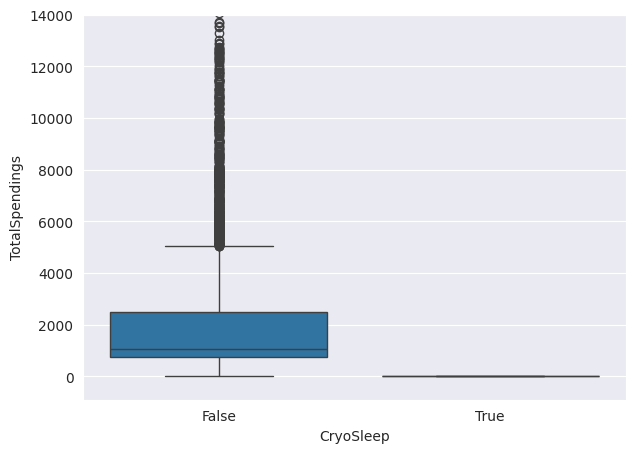

In [ ]:
# CryoSleep vs TotalSpendings
plt.figure(figsize = (7, 5))

sns.boxplot(data = train_df_1, x = "CryoSleep", y = "TotalSpendings")
plt.ylim([-900, 14000])

(-800.0, 12000.0)

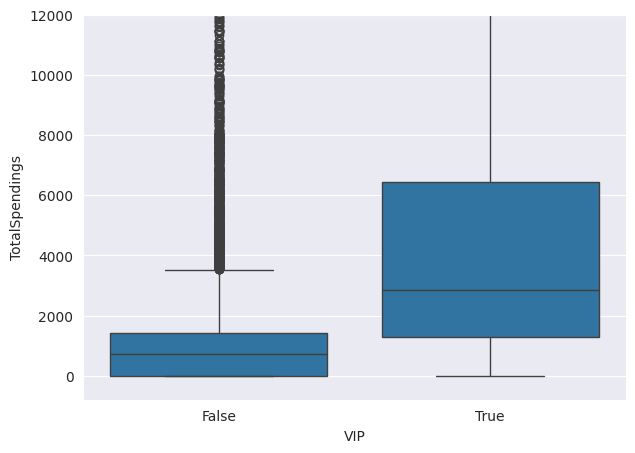

In [ ]:
# VIP vs TotalSpendings
plt.figure(figsize = (7, 5))

sns.boxplot(data = train_df_1, x = "VIP", y = "TotalSpendings")
plt.ylim([-800, 12000])

(-800.0, 12000.0)

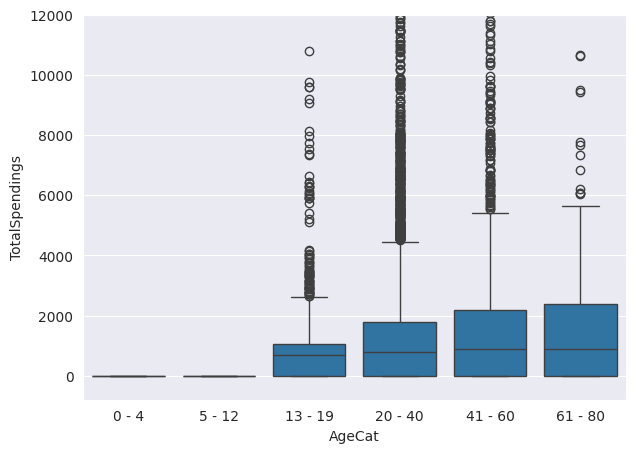

In [ ]:
# AgeCat vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df_1, x = "AgeCat", y = "TotalSpendings")
plt.ylim([-800, 12000])

In [ ]:
train_df_2 = train_df_1.copy()

# drop features created during EDA
train_df_2 = train_df_2.drop(["PassengerGroup",
                              "CabinDeck",
                              "CabinNo.",
                              "CabinSide",
                              "FamilyName",
                              "NoRelatives",
                              "NoInPassengerGroup",
                              "AgeCat",
                              "FamilySizeCat",
                              "TotalSpendings",
                              "IsAlone"], axis = 1)

In [ ]:
# save target variable in train dataset and save it in target
target = train_df_2["Transported"]

# save test PassengerId in test_id
test_id = test_df_1["PassengerId"]

# drop Transported variable from the train set
train_df_3 = train_df_2.drop(["Transported"], axis = 1)

# Join the train and test set
data = pd.concat([train_df_3, test_df], axis = 0).reset_index(drop = True)

In [ ]:
# Print shape of data
print(data.shape)

(12970, 13)


In [ ]:
# view percentage of values missing in each column
round(data.isna().sum() * 100/data.shape[0], 3)

PassengerId     0.000
HomePlanet      2.221
CryoSleep       2.390
Cabin           2.305
Destination     2.113
Age             2.082
VIP             2.282
RoomService     2.028
FoodCourt       2.228
ShoppingMall    2.359
Spa             2.190
VRDeck          2.066
Name            2.267
dtype: float64

In [ ]:
# get categorical columns in train dataset with missing values and store in missing_cat_cols
data_1 = data.copy()

list_missing_cat_columns = list((data_1.select_dtypes(['object', 'category']).isna().sum() > 0).index)
list_missing_cat_columns

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [ ]:
# Fill Categorical columns in data with mode
for col in list_missing_cat_columns:
    data_1[col] = data_1[col].fillna(data_1[col].mode()[0])

In [ ]:
# Fill missing values for numeric columns

# get numeric columns with missing values and store in lst_missing_numeric_col
list_missing_numeric_col = list((data_1.select_dtypes(np.number).isna().sum() > 0).index)
list_missing_numeric_col

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
# Filling NaNs based on Age
def fill_nans_by_age_and_cryosleep(df):
    df["RoomService"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["RoomService"])
    df["FoodCourt"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["FoodCourt"])
    df["ShoppingMall"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["ShoppingMall"])
    df["Spa"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["Spa"])
    df["VRDeck"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["VRDeck"])

    return df

data_1 = fill_nans_by_age_and_cryosleep(data_1)

In [ ]:
# Fill numeric columns in train dataset with mean
for col in list_missing_numeric_col:
    data_1[col] = data_1[col].fillna(data_1[col].mean())
data_1.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [ ]:
# clip outliers on 99% quantile
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(quantile)
    for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df

    data_1 = clipping_quantile(data_1, None, 0.99)

In [ ]:
def extract_features(df):
    df["PassengerGroup"] = (df["PassengerId"].str.split('_', expand = True))[0]

    No_People_In_PassengerGroup = df.groupby('PassengerGroup').aggregate({'PassengerId': 'size'}).reset_index()
    No_People_In_PassengerGroup = No_People_In_PassengerGroup.rename(columns = {"PassengerId": "NoInPassengerGroup"})
    # Create IsAlone feature
    No_People_In_PassengerGroup["IsAlone"] = No_People_In_PassengerGroup["NoInPassengerGroup"].apply(lambda x: "Not Alone" if x > 1 else "Alone")
    df = df.merge(No_People_In_PassengerGroup[["PassengerGroup", "IsAlone"]], how = 'left', on = ['PassengerGroup'])

    # Create CabinDeck feature
    df["CabinDeck"] = df["Cabin"].str.split('/', expand = True)[0]
    # Create DeckPosition feature
    df["DeckPosition"] = df["CabinDeck"].apply(lambda deck: "Lower" if deck in ('A', 'B', 'C', 'D') else "Higher" )
    # Create CabinSide feature
    df["CabinSide"] = df["Cabin"].str.split('/', expand = True)[2]

    # Create Regular feature
    df["Regular"] = df["FoodCourt"] + df["ShoppingMall"]
    # Create Luxury feature
    df["Luxury"] = df["RoomService"] + df["Spa"] + df["VRDeck"]
    # Create TotalSpendings feature
    df["TotalSpendings"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

    Wealthiest_Deck = df.groupby('CabinDeck').aggregate({'TotalSpendings': 'sum', 'PassengerId': 'size'}).reset_index()
    # Create DeckAverageSpent feature
    Wealthiest_Deck['DeckAverageSpent'] = Wealthiest_Deck['TotalSpendings'] / Wealthiest_Deck['PassengerId']

    df = df.merge(Wealthiest_Deck[["CabinDeck", "DeckAverageSpent"]], how = 'left', on = ['CabinDeck'])

    df["FamilyName"] = df["Name"].str.split(' ', expand = True)[1]
    # Create NoRelatives feature
    NoRelatives = df.groupby('FamilyName')['PassengerId'].count().reset_index()
    NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NoRelatives"})

    df = df.merge(NoRelatives[["FamilyName", "NoRelatives"]], how = 'left', on = ['FamilyName'])
    # Create FamilySizeCat feature
    df["FamilySizeCat"] = pd.cut(df.NoRelatives, bins = [0, 2, 5, 10, 300], labels = ['0 - 2', '3 - 5', '6 - 10', '11 - 208'])

    return df

data_2 = data_1.copy()
data_2 = extract_features(data_2)

In [ ]:
data_3 = data_2.copy()
irrelevant_columns = ["Cabin", "PassengerId", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name", "FamilyName", "PassengerGroup"]
data_3 = data_3.drop(irrelevant_columns, axis = 1)

data_3.shape

(12970, 15)

In [ ]:
# Categorical Encoding
data_3 = pd.get_dummies(data_3, columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinSide', 'IsAlone'])

# Ordinal Encoding
for col in ['CabinDeck', 'DeckPosition', 'FamilySizeCat']:
    data_3[col], _ = data_3[col].factorize()

In [ ]:
# split the data back to get the train and test data
data_4 = data_3.copy()
train_data_final = data_4.loc[:train_df.index.max(),  :].copy()
test_data_final = data_4.loc[train_df.index.max() + 1:, :].reset_index(drop = True).copy()

In [ ]:
# print shape of final train data
print(train_data_final.shape)

# print shape of final train data
print(test_data_final.shape)

(8693, 23)
(4277, 23)


In [ ]:
X = train_data_final.copy()

# save target variable in in y
y = target.astype(int)

In [ ]:
# Univariate feature selection
chi_selector = SelectKBest(chi2, k = 22).fit(X, y)

chi_support = chi_selector.get_support()
chi_feature = X.loc[:, chi_support].columns
chi_feature

Index(['Age', 'CabinDeck', 'DeckPosition', 'Regular', 'Luxury',
       'TotalSpendings', 'DeckAverageSpent', 'NoRelatives', 'FamilySizeCat',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'CabinSide_P',
       'CabinSide_S', 'IsAlone_Alone', 'IsAlone_Not Alone'],
      dtype='object')

In [ ]:
X = X[chi_feature]

# baseline model
baseline_model = CatBoostClassifier(random_state=1)
baseline_model.fit(X, y)

Learning rate set to 0.025939
0:	learn: 0.6785184	total: 64.8ms	remaining: 1m 4s
1:	learn: 0.6637099	total: 86.7ms	remaining: 43.3s
2:	learn: 0.6508621	total: 108ms	remaining: 36.1s
3:	learn: 0.6393970	total: 120ms	remaining: 29.9s
4:	learn: 0.6280875	total: 131ms	remaining: 26s
5:	learn: 0.6153712	total: 137ms	remaining: 22.6s
6:	learn: 0.6056400	total: 142ms	remaining: 20.1s
7:	learn: 0.5962223	total: 146ms	remaining: 18.1s
8:	learn: 0.5858817	total: 150ms	remaining: 16.5s
9:	learn: 0.5770300	total: 155ms	remaining: 15.4s
10:	learn: 0.5698563	total: 161ms	remaining: 14.5s
11:	learn: 0.5622413	total: 166ms	remaining: 13.7s
12:	learn: 0.5553197	total: 170ms	remaining: 12.9s
13:	learn: 0.5479998	total: 175ms	remaining: 12.3s
14:	learn: 0.5412208	total: 180ms	remaining: 11.8s
15:	learn: 0.5352885	total: 185ms	remaining: 11.4s
16:	learn: 0.5302766	total: 198ms	remaining: 11.4s
17:	learn: 0.5247005	total: 204ms	remaining: 11.1s
18:	learn: 0.5199303	total: 208ms	remaining: 10.7s
19:	learn: 

In [ ]:
# store accuracy of baseline model prediction in results
result = cross_val_score(baseline_model, X, y, cv = 20, scoring = "accuracy")

# print mean and standard deviation of baseline model
print(np.mean(result))
print(np.std(result))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6090194	total: 34.5ms	remaining: 4.89s
7:	learn: 0.5997615	total: 39.2ms	remaining: 4.87s
8:	learn: 0.5903280	total: 43.5ms	remaining: 4.79s
9:	learn: 0.5820482	total: 47.9ms	remaining: 4.75s
10:	learn: 0.5742856	total: 53.3ms	remaining: 4.79s
11:	learn: 0.5673864	total: 58.2ms	remaining: 4.79s
12:	learn: 0.5595061	total: 63.3ms	remaining: 4.8s
13:	learn: 0.5522040	total: 67.6ms	remaining: 4.76s
14:	learn: 0.5453927	total: 72.4ms	remaining: 4.75s
15:	learn: 0.5395305	total: 76.8ms	remaining: 4.72s
16:	learn: 0.5337636	total: 81.2ms	remaining: 4.69s
17:	learn: 0.5267665	total: 86.1ms	remaining: 4.7s
18:	learn: 0.5219914	total: 90.4ms	remaining: 4.67s
19:	learn: 0.5169666	total: 94.9ms	remaining: 4.65s
20:	learn: 0.5125377	total: 99.4ms	remaining: 4.64s
21:	learn: 0.5073887	total: 104ms	remaining: 4.64s
22:	learn: 0.5038474	total: 109ms	remaining: 4.61s
23:	learn: 0.4996918	total: 113ms	remaining: 4.59s
24:	learn: 0.4958948	t

In [ ]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

# Perform grid search
grid_search = GridSearchCV(CatBoostClassifier(random_state=1, verbose=0), param_grid, cv=5)
grid_search.fit(X, y)

# Get the best estimator
best_model = grid_search.best_estimator_

In [ ]:
# Build final model with the optimized values
model_final = CatBoostClassifier(iterations=best_model.get_params()['n_estimators'],
                                 learning_rate=best_model.get_params()['learning_rate'],
                                 depth=best_model.get_params()['depth'],
                                 random_state=1, verbose=0)

# Fit the final model
model_final.fit(X, y)


In [ ]:
# store accuracy of each final model's prediction in result
result_final = cross_val_score(model_final, X, y, cv = 20, scoring = "accuracy")

# print mean and standard deviation of the accuracy of the final model

print(np.mean(result_final))
print(np.std(result_final))

0.808815880078394
0.020184907590971655


In [ ]:
# use final model to predict on the test data and store predictions in prediction
prediction = model_final.predict(test_data_final[chi_feature])

In [ ]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [ ]:
# store predictions in a dataframe
pred_dict = {"PassengerId" : test_df_1["PassengerId"], "Transported": prediction}
pred_df = pd.DataFrame(pred_dict)

# replacing 0 with False and 1 with True
pred_df["Transported"] = pred_df["Transported"].map({1 : True, 0: False})

# convert submission dataframe to .csv format
pred_df.to_csv("titanic_submissionCB.csv", index = False)

In [ ]:
# plot feature importances
importances = pd.Series(model_final.feature_importances_, index = X.columns)
importances.plot(kind = 'barh', figsize = (12, 8))